In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

HD_ratio = 0.5625   #1920x1080 

game_name = "Vampire Survivors"

In [2]:
#get json in a directory, both directory and json are set to have the game_name name
df = pd.read_json(game_name + "/" + game_name + ".json", lines=True)
all_words = " ".join(i for i in df['cleaned_text'])

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   thumbs_up        287 non-null    bool   
 1   text             287 non-null    object 
 2   helpful_votes    287 non-null    int64  
 3   funny_votes      287 non-null    int64  
 4   reward           287 non-null    int64  
 5   gametime_record  287 non-null    float64
 6   cleaned_text     287 non-null    object 
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 13.9+ KB
None


In [4]:
df

,thumbs_up,text,helpful_votes,funny_votes,reward,gametime_record,cleaned_text
0,True,"well i went to Pharmacy, why the hell they don...",6,0,0,13.2,well went pharmacy hell dont vampire survivor ...
1,True,Cross is better than Heaven Sword.,2,0,0,73.3,cross better heaven sword
2,True,"The game is so addicting, you start and sudden...",2,0,0,15.1,game addict start sudden 4 hour later
3,False,there is no feet,1,0,0,45.0,foot
4,True,"Im hooked, and cannot put this game down.",1,0,0,22.4,im hook cannot put game
...,...,...,...,...,...,...,...
282,True,Diablo for people with 2+ kg of microplastics ...,0,0,0,58.8,diablo people 2 kg microplast brain stem basic...
283,True,good game,0,0,0,28.7,good game
284,True,Super fun game and cool to unlock stuff. Very ...,0,0,0,26.6,super fun game cool unlock stuff arcadelik
285,True,If you love Castlevania and Hades this is a ga...,0,0,0,47.9,love castlevania have game great game really s...


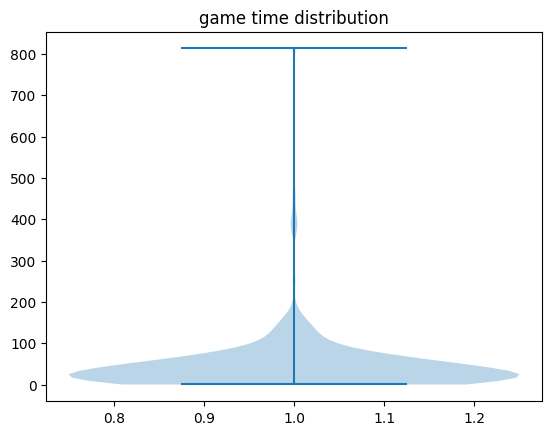

In [14]:
plt.violinplot(dataset=df['gametime_record'])
plt.title("game time distribution")
plt.show()

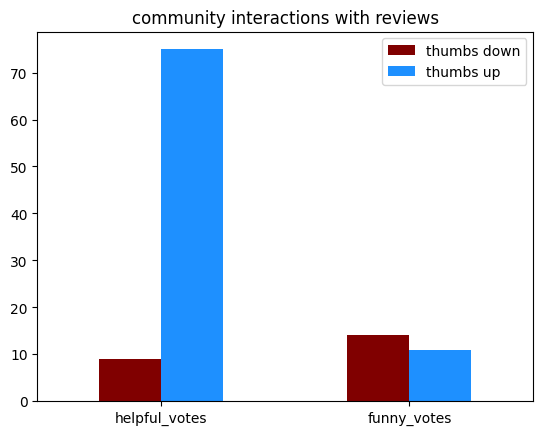

In [6]:
fig, ax = plt.subplots()
temp = df.loc[:,['thumbs_up','helpful_votes','funny_votes']].groupby("thumbs_up").sum().transpose()
temp.rename(columns={False:'thumbs down', True:'thumbs up'}, inplace=True)
temp.plot.bar(rot=0, color=['maroon','dodgerblue'], ax=ax)
ax.set_title('community interactions with reviews')
ax.legend()

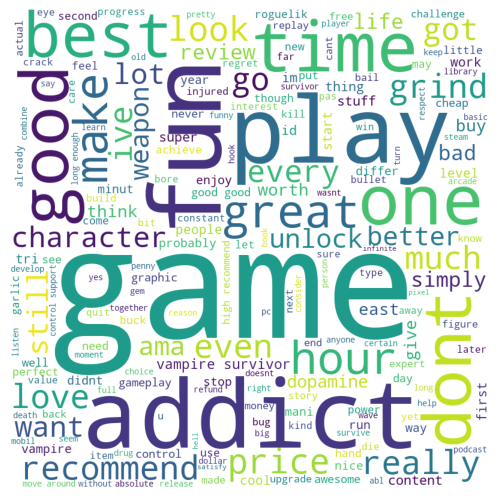

In [7]:
# word cloud
wc = WordCloud(width=800, height=800, background_color='white',max_words=200).generate(all_words)

plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

#save to file
wc.to_file(game_name + "/word cloud.png")

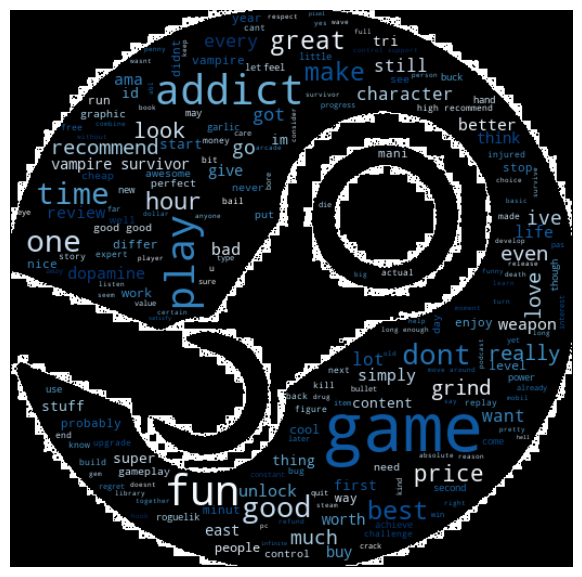

In [8]:
# word cloud but prettier, or not?

# steam colors = ['#fff', '#111d2e', '#051839', '#0a1b48', '#132e62', '#144b7e', '#136497', '#1387b8']
bw_image = Image.open("mask_images/steam_logo.jpg")
color_image =  np.array(Image.open("mask_images/steam_logo_color.png"))
mask = np.array(ImageOps.invert(bw_image))
#wc = WordCloud(max_words=200, color_func=ImageColorGenerator(color_image) ,background_color='white', mask=mask, contour_width=3, contour_color='#132e62').generate(all_words)
wc2 = WordCloud(max_words=200, colormap='Blues' , mask=mask, contour_width=1, contour_color='white').generate(all_words)

plt.figure(figsize=(10*0.5625,10))
#plt.imshow(wc.recolor(color_func=ImageColorGenerator(color_image)), interpolation="bilinear", aspect='equal')
plt.imshow(wc2, interpolation="bilinear", aspect='equal')
plt.axis("off")
plt.tight_layout(pad = 0)

#save to file
wc2.to_file(game_name + "/word cloud masked.png")